In [1]:
#Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statistics import mode

# Loading the Dataset and Reading it

In [2]:
#loading Dataset
data = pd.read_csv("Dataset.csv")

In [3]:
#displaying first 10 rows of data
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

1. **Encounter ID** Unique identifier of an encounter
2. **Patient number** Unique identifier of a patient
3. **Race Values**: Caucasian, Asian, African American, Hispanic, and other
4. **Gender Values**: male, female, and unknown/invalid
5. **Age Grouped in 10-year intervals**: 0, 10), 10, 20), …, 90, 100)
6. **Weight** Weight in pounds
7. **Admission type** Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
8. **Discharge disposition** Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
9. **Admission source** Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
10. **Time in hospital** Integer number of days between admission and discharge
11. **Payer code** Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
12. **Medical specialty** Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
13. **Number of lab procedures** Number of lab tests performed during the encounter
14. **Number of procedures** Numeric Number of procedures (other than lab tests) performed during the encounter
15. **Number of medications** Number of distinct generic names administered during the encounter
16. **Number of outpatient** visits Number of outpatient visits of the patient in the year preceding the encounter
17. **Number of emergency** visits Number of emergency visits of the patient in the year preceding the encounter
18. **Number of inpatient** visits Number of inpatient visits of the patient in the year preceding the encounter
19. **Diagnosis 1** The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
20. **Diagnosis 2** Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
21. **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
22. **Number of diagnoses** Number of diagnoses entered to the system 0%
23. **Glucose serum test result** Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
24. **A1c test result** Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
25. **Change of medications** Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
26. **Diabetes medications** Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
27. **Readmitted Days** to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [5]:
#import pandas_profiling

In [6]:
data.describe(include='all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,6,3,10,10,NaN,NaN,NaN,NaN,...,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,98569,NaN,NaN,NaN,NaN,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

In [7]:
# Dealing with null values
#in dataset the missing values are represented in "?" sign so lets remove it

for i in data.columns:
    if data[i].dtype==object:
         print(i,data[i][data[i] == '?'].count())


race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


if we observe above results the features like weight, payer_code, medical_specialty are having highest missing value count. Feature weight contains approximate 98% of missing values so there is no significance in filling them. Feature Payer code & Medical Speciality contains approx 40% missing values, so i am going to drop them too.

In [8]:
data['weight'].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [9]:
data.loc[(data['age'].notnull())&(data['weight']!='?'),['age','weight']].groupby(["age",'weight'])['weight'].count()

age       weight  
[0-10)    [0-25)        3
          [25-50)       2
[10-20)   [25-50)       4
          [50-75)      14
[20-30)   [0-25)        1
                     ... 
[80-90)   [50-75)     231
          [75-100)    231
[90-100)  [25-50)       9
          [50-75)      59
          [75-100)     24
Name: weight, Length: 61, dtype: int64

Comming to PayerCode it gives us data whether the patient joined through Blue Cross/Blue Shield, Medicare, and self-pay Medical. 

In [10]:
data.groupby('age').size()

age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
dtype: int64

In [11]:
data.medical_specialty.replace('?','unknown',inplace = True)

In [12]:
data.medical_specialty.unique()

array(['Pediatrics-Endocrinology', 'unknown', 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicin

In [13]:
#data['medical_specialty'] = data['medical_specialty'].fillna('unknown')

In [14]:
data.loc[data['medical_specialty']=='?','medical_specialty']

Series([], Name: medical_specialty, dtype: object)

Let's investigate medical specialty before we begin.

In [15]:
print('Number medical specialty:', data.medical_specialty.nunique())
data.groupby('medical_specialty').size().sort_values(ascending = False)

Number medical specialty: 73


medical_specialty
unknown                             49949
InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
                                    ...  
Psychiatry-Addictive                    1
Dermatology                             1
Speech                                  1
SportsMedicine                          1
Surgery-PlasticwithinHeadandNeck        1
Length: 73, dtype: int64

In [16]:
top_10 = ['UNK','InternalMedicine','Emergency/Trauma',\
          'Family/GeneralPractice', 'Cardiology','Surgery-General' ,\
          'Nephrology','Orthopedics',\
          'Orthopedics-Reconstructive','Radiologist']

# make a new column with duplicated data
data['med_spec'] = data['medical_specialty'].copy()

# replace all specialties not in top 10 with 'Other' category
data.loc[~data.med_spec.isin(top_10),'med_spec'] = 'Other'

In [17]:
data.groupby('med_spec').size()

med_spec
Cardiology                     5352
Emergency/Trauma               7565
Family/GeneralPractice         7440
InternalMedicine              14635
Nephrology                     1613
Orthopedics                    1400
Orthopedics-Reconstructive     1233
Other                         58289
Radiologist                    1140
Surgery-General                3099
dtype: int64

In [18]:
data[['age', 'weight']].head()


,age,weight
0,[0-10),?
1,[10-20),?
2,[20-30),?
3,[30-40),?
4,[40-50),?


data.weight.replace('?','unknown',inplace = True)

In [19]:
#data.age.unique()

In [20]:
#data.weight.notnull().sum()


In [21]:
#data['has_weight'] = data.weight.notnull().astype('int')

In [22]:
#data['has_weight'].unique()

In [23]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'med_spec'],
      dtype='object')

In [24]:
#Dropping these columns,
data = data.drop(['weight','payer_code','medical_specialty'],axis=1)

From pandas profiling report we came to know Citoglipton and examide has constant values 'NO' which is not gonna create much impact

In [25]:
data = data.drop(['citoglipton', 'examide'], axis = 1)

In [26]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,med_spec
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,Other
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,Other
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,Other
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,Other
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,Other


In [27]:
data['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

primary diagnosis, secondary diagnosis, & additional diagnosis are having very less null values so i am dropping only the rows containing nullvalues

In [28]:
drop_values = set(data[(data['diag_1'] == '?') & (data['diag_2'] == '?') & (data['diag_3'] == '?')].index)

drop_values = drop_values.union(set(data['diag_1'][data['diag_1'] == '?'].index))
drop_values = drop_values.union(set(data['diag_2'][data['diag_2'] == '?'].index))
drop_values = drop_values.union(set(data['diag_3'][data['diag_3'] == '?'].index))
drop_values = drop_values.union(set(data['race'][data['race'] == '?'].index))
drop_values = drop_values.union(set(data[data['discharge_disposition_id'] == 11].index))

In [29]:
new_values = list(set(data.index)-set(drop_values))
data = data.iloc[new_values]

In [30]:
data.describe(include = 'all')

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,med_spec
count,9.644700e+04,9.644700e+04,96447,96447,96447,96447.000000,96447.000000,96447.000000,96447.000000,96447.000000,...,96447,96447,96447,96447,96447,96447,96447,96447,96447,96447
unique,NaN,NaN,5,3,10,NaN,NaN,NaN,NaN,NaN,...,4,4,2,2,1,2,2,2,3,10
top,NaN,NaN,Caucasian,Female,[70-80),NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,Yes,NO,Other
freq,NaN,NaN,73835,52006,24816,NaN,NaN,NaN,NaN,NaN,...,45261,95786,96434,96446,96447,96446,51719,74291,50732,55196
mean,1.659535e+08,5.483692e+07,NaN,NaN,NaN,2.030514,3.632700,5.760563,4.415420,42.992763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.025184e+08,3.868106e+07,NaN,NaN,NaN,1.450935,5.269729,4.074101,2.982335,19.657060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.522830e+07,2.348840e+07,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,31.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.534117e+08,4.690138e+07,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,44.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.308025e+08,8.804246e+07,NaN,NaN,NaN,3.000000,3.000000,7.000000,6.000000,57.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


if you compare 1st describe table and the above table we can find the difference in frequency, count & other values too.

In [31]:
data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [32]:
#Checking for missing values in the data
for col in data.columns:
    if data[col].dtype == object:
         print(col,data[col][data[col] == '?'].count())
         #print(col,data[col][data[col] == 'Nan'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
med_spec 0


In [33]:
#Checking for missing values in the data
for col in data.columns:
    if data[col].dtype == int:
         print(col,[data[col] == '?'].count())

In [34]:
data['readmitted'].unique()

array(['>30', 'NO', '<30'], dtype=object)

In [35]:
data.groupby('readmitted').size( )

readmitted
<30    11066
>30    34649
NO     50732
dtype: int64

Now let's check our rehospitalization rate of the patients. Here we will try to predict if a patient is likely to be re-admitted within 30 days of discharge

In [36]:
data['rehospitalized_rate'] = (data.readmitted == '<30').astype('int')

Let's define a function to calculate the prevalence of population that is readmitted with 30 days.

In [37]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [38]:
print('Prevalence:%.3f'%calc_prevalence(data['rehospitalized_rate'].values))

Prevalence:0.115


Around 11% of the population is rehospitalized. This represented an imbalanced classification problem so we will address that below.
Now we would like to get a feeling of the data for each column in our dataset. 

In [39]:
#data['readmit'] = np.where(data['readmitted'] == 'NO', 0, 1)

In [40]:
# We can see that there are three types of values:- 'NO','<30','>30'. So, to make it a categorical variable so that different  
# ML techniques can be applies.

data['readmitted'] = data['readmitted'].replace('>30', 0)
data['readmitted'] = data['readmitted'].replace('<30', 1)
data['readmitted'] = data['readmitted'].replace('NO', 0)

discharge_disposition_id,description,
1,Discharged to home,
2,Discharged/transferred to another short term hospital,
3,Discharged/transferred to SNF,
4,Discharged/transferred to ICF,
5,Discharged/transferred to another type of inpatient care institution,
6,Discharged/transferred to home with home health service,
7,Left AMA,
8,Discharged/transferred to home under care of Home IV provider,
9,Admitted as an inpatient to this hospital,
10,Neonate discharged to another hospital for neonatal aftercare,
11,**Expired**,
12,Still patient or expected to return for outpatient services,
13,**Hospice** / home,
14,**Hospice** / medical facility,
15,Discharged/transferred within this institution to Medicare approved swing bed,
16,Discharged/transferred/referred another institution for outpatient services,
17,Discharged/transferred/referred to this institution for outpatient services,
18,NULL,
19,**"Expired at home. Medicaid only, hospice."**,
20,**"Expired in a medical facility. Medicaid only, hospice."**,
21,**"Expired, place unknown. Medicaid only, hospice."**,
22,Discharged/transferred to another rehab fac including rehab units of a hospital .,
23,Discharged/transferred to a long term care hospital.,
24,Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.,
25,Not Mapped,
26,Unknown/Invalid,
30,Discharged/transferred to another Type of Health Care

If we see in discharge description there are people who died before & after comming to hospital (i.e 11, 13, 14, 19, 20, 21).Hospice care: Care designed to give supportive care to people in the final phase of a terminal illness.  so we are going to drop those values too 

In [41]:
# Removing the pateints from the dataset that are dead.

data = data[((data.discharge_disposition_id != 11) & 
                                          (data.discharge_disposition_id != 13) &
                                          (data.discharge_disposition_id != 14) & 
                                          (data.discharge_disposition_id != 19) & 
                                          (data.discharge_disposition_id != 20) & 
                                          (data.discharge_disposition_id != 21))]

In [42]:
data['discharge_disposition_id'].unique()

array([ 1,  3,  6,  2,  5,  7, 25, 10,  4, 18,  8, 12, 16, 17, 22, 23,  9,
       15, 24, 28, 27], dtype=int64)

# EDA Sample

In [43]:
df = ['num_procedures', 'num_medications', 'number_emergency','number_inpatient', 'number_outpatient']

In [44]:
sns.pairplot(data[df])

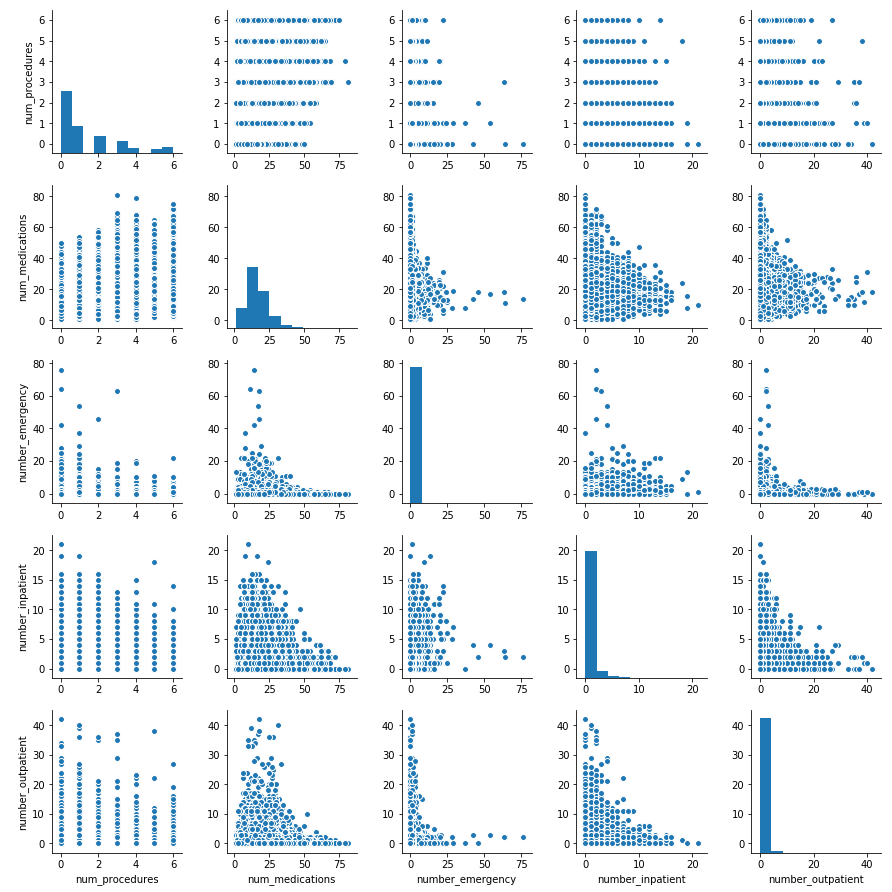

In [45]:
plt.show()

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


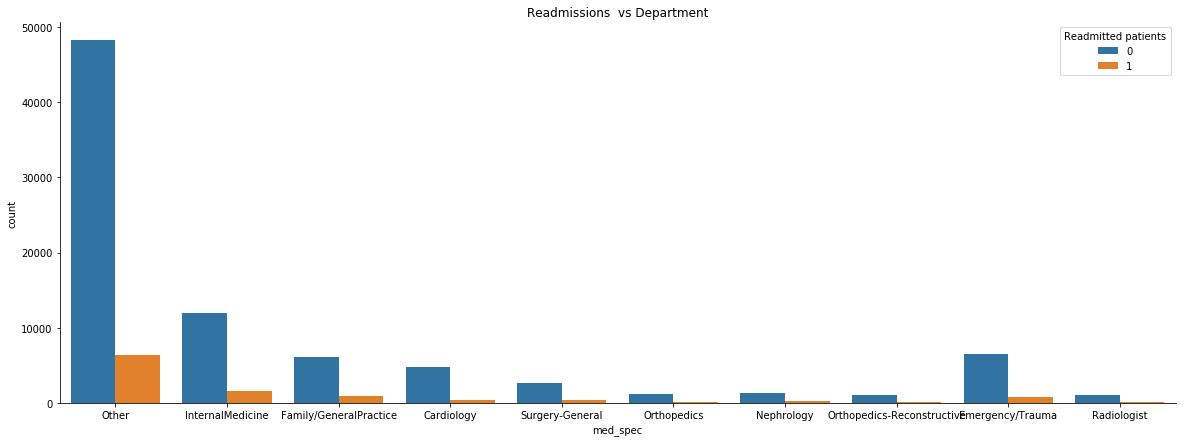

In [46]:
plot1 = sns.countplot(x = 'med_spec', hue = 'readmitted', data = data) 

sns.despine()
plot1.figure.set_size_inches(20, 7)
plot1.legend(title = 'Readmitted patients')
plot1.axes.set_title('Readmissions  vs Department')
plt.show()

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


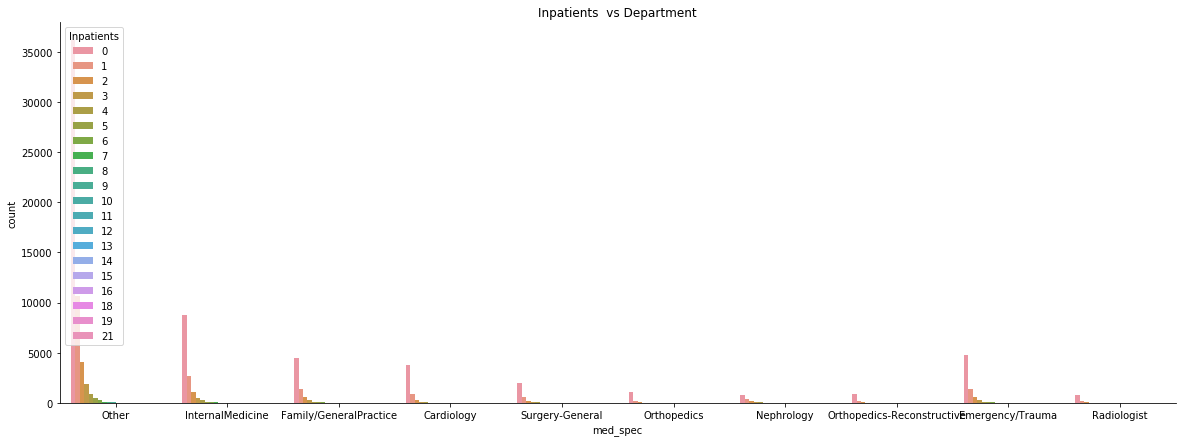

In [47]:
plot1 = sns.countplot(x = 'med_spec', hue = 'number_inpatient', data = data) 

sns.despine()
plot1.figure.set_size_inches(20, 7)
plot1.legend(title = 'Inpatients')
plot1.axes.set_title('Inpatients  vs Department')
plt.show()

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


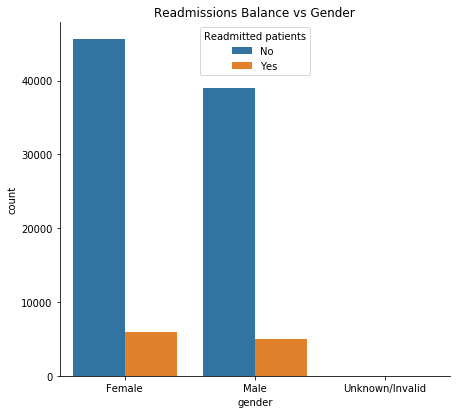

In [48]:
#Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = 'readmitted', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance vs Gender')
plt.show()

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


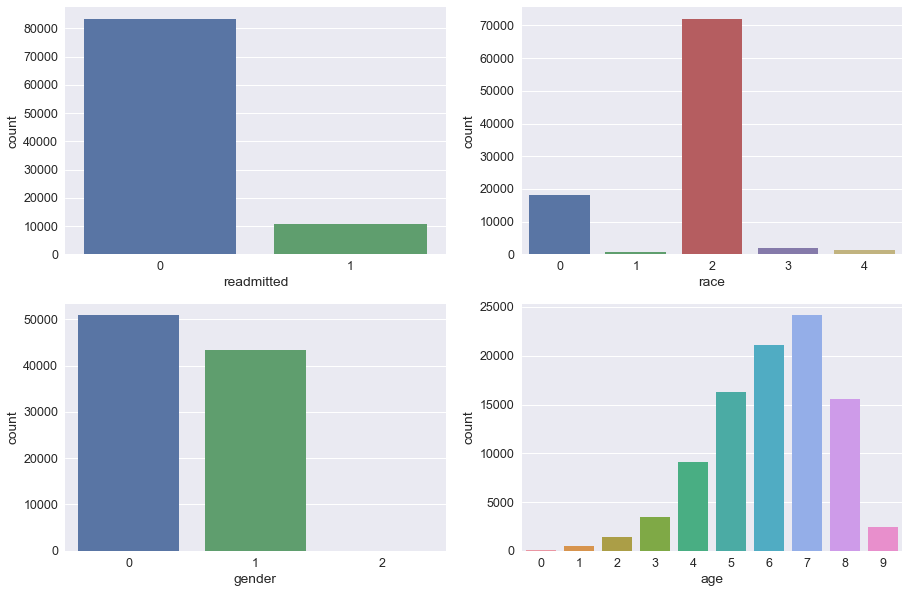

In [138]:
#Exploring the categorical variables,
fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)

sns.countplot(x="readmitted", data=data, ax=ax[0][0])
sns.countplot(x="race", data=data, ax=ax[0][1])
sns.countplot(x="gender", data=data, ax=ax[1][0])
sns.countplot(x="age", data=data, ax=ax[1][1])

In [137]:
plt.show()

# Feature Engineering

In terms of health care, Health service utilization is defined as number of outpatients visits and inpatient days  and mean cost of outpatient and inpatient treatments.
So, as per our dataset they number of inpatient (admissions), emergency room visits and outpatient visits for a given patient one year. It measure hospital servies for a person.

In [50]:
data['service_utilization'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']

No of Medication Changes: the dataset contains 23 features for 23 drugs. lets count the medication change for the patient during his hospital stay. we can declare it as new feature. It helps us to simplify the model. 

In [51]:
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

for i in drugs:
    colname = str(i)+ 'temp'
    data[colname] = data[i]. apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
data['Medication'] = 0
for i in drugs:
    colname = str(i)+ 'temp'
    data['Medication'] = data['Medication'] + data[colname]
    del data[colname]
    
data['Medication'].value_counts()

0    69599
1    24701
2     1262
3      106
4        5
Name: Medication, dtype: int64

In [52]:
columns = data.columns.tolist()
for i in columns:
    print(i)
    print(data[i].unique())
    print('\n')

encounter_id
[   149190     64410    500364 ... 443854148 443857166 443867222]


patient_nbr
[ 55629189  86047875  82442376 ... 140199494 120975314 175429310]


race
['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']


gender
['Female' 'Male' 'Unknown/Invalid']


age
['[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)'
 '[80-90)' '[90-100)' '[0-10)']


admission_type_id
[1 2 3 6 4 5 8 7]


discharge_disposition_id
[ 1  3  6  2  5  7 25 10  4 18  8 12 16 17 22 23  9 15 24 28 27]


admission_source_id
[ 7  2  4  1  5 20  6  3 17  8  9 14 10 22 11 25 13]


time_in_hospital
[ 3  2  1  4  5 13 12  9  7 10 11  6  8 14]


num_lab_procedures
[ 59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29  35
  42  19  64  25  53  52  87  27  37  41  28  36  48  10   2  65  67  40
  58  57  32  83  34  39  69  38  22  96  46  72  78  56  61  88  66  43
  50   1  18  82  54   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26

[0 1]


med_spec
['Other' 'InternalMedicine' 'Family/GeneralPractice' 'Cardiology'
 'Surgery-General' 'Orthopedics' 'Nephrology' 'Orthopedics-Reconstructive'
 'Emergency/Trauma' 'Radiologist']


rehospitalized_rate
[0 1]


service_utilization
[ 0  3  1  2  6  7 10  5  4 14 15  8 12  9 13 11 18 17 25 27 23 30 16 31
 19 20 21 22 35 49 34 38 28 26 24 32 42 40 36 33 29 37 48 80 68 61 41]


Medication
[1 0 2 3 4]




In [53]:
#data =  data.drop(['readmitted'], axis = 1)

if we see unique values for each feature we can find the strings. so now we have to change the categorical columns into numerical columns for better fit to our model.

**Encoding Features** : Gender, Race, Medication change, Drugs, A1Cresult, max_glu_serum used contains string values. 

In [54]:
data['max_glu_serum'] = data['max_glu_serum'].replace('>200','low')
data['max_glu_serum'] = data['max_glu_serum'].replace('>300','high')

In [55]:
data['max_glu_serum'].unique()

array(['None', 'high', 'Norm', 'low'], dtype=object)

In [56]:
data['A1Cresult'] = data['A1Cresult'].replace('>7', 'low')
data['A1Cresult'] = data['A1Cresult'].replace('>8', 'high')

In [57]:
data['A1Cresult'].unique()

array(['None', 'low', 'high', 'Norm'], dtype=object)

In [58]:
data['diabetesMed'] = data['diabetesMed'].replace('Yes', 1)
data['diabetesMed'] = data['diabetesMed'].replace('No', 0)

data['change'] = data['change'].replace('Ch', 1)
data['change'] = data['change'].replace('No', 0)

data['gender'] = data['gender'].replace('Male', 1)
data['gender'] = data['gender'].replace('Female', 0)
data['gender'] = data['gender'].replace('Unknown/Invalid', 'Unknown')

**Understanding the diagnostic codes given in diag_1, diag_2, diag_3**: According to ICD-9-CM- Diagnostic codes each interval of number is defined with some of terms like "infections", "neoplasms" e.t.c. to know more please do refer https://www.findacode.com/code-set.php?set=ICD9 

In [59]:
#Encoding the data,

def map_now():
    listname = [('infections', 139),
                ('neoplasms', (239 - 139)),
                ('endocrine', (279 - 239)),
                ('blood', (289 - 279)),
                ('mental', (319 - 289)),
                ('nervous', (359 - 319)),
                ('sense', (389 - 359)),
                ('circulatory', (459-389)),
                ('respiratory', (519-459)),
                ('digestive', (579 - 519)),
                ('genitourinary', (629 - 579)),
                ('pregnancy', (679 - 629)),
                ('skin', (709 - 679)),
                ('musculoskeletal', (739 - 709)),
                ('congenital', (759 - 739)),
                ('perinatal', (779 - 759)),
                ('ill-defined', (799 - 779)),
                ('injury', (999 - 799))]
    
    
    dictcout = {}
    count = 1
    for name, num in listname:
        for i in range(num):
            dictcout.update({str(count): name})  
            count += 1
    return dictcout
  

def codemap(data, codes):
    import pandas as pd
    namecol = data.columns.tolist()
    for col in namecol:
        temp = [] 
        for num in data[col]:           
            if ((num is None) | (num in ['unknown', '?']) | (pd.isnull(num))): temp.append('unknown')
            elif(num.upper()[0] == 'V'): temp.append('supplemental')
            elif(num.upper()[0] == 'E'): temp.append('injury')
            else: 
                lkup = num.split('.')[0]
                temp.append(codes[lkup])           
        data.loc[:, col] = temp               
    return data 


listcol = ['diag_1', 'diag_2', 'diag_3']
codes = map_now()
data[listcol] = codemap(data[listcol], codes)

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [60]:
print(data['diag_1'].unique())
print(data['diag_2'].unique())
print(data['diag_3'].unique())

['endocrine' 'pregnancy' 'infections' 'neoplasms' 'circulatory'
 'respiratory' 'injury' 'skin' 'supplemental' 'ill-defined'
 'genitourinary' 'mental' 'musculoskeletal' 'digestive' 'nervous' 'blood'
 'sense' 'congenital']
['endocrine' 'neoplasms' 'circulatory' 'respiratory' 'blood' 'injury'
 'musculoskeletal' 'genitourinary' 'infections' 'digestive' 'skin'
 'supplemental' 'nervous' 'ill-defined' 'mental' 'pregnancy' 'congenital'
 'sense']
['endocrine' 'supplemental' 'circulatory' 'infections' 'respiratory'
 'injury' 'neoplasms' 'genitourinary' 'ill-defined' 'digestive' 'skin'
 'mental' 'musculoskeletal' 'congenital' 'nervous' 'sense' 'pregnancy'
 'blood']


In [61]:
# Cleaning the data, replacing the null values in numeric data by 0 and object data by unknown,

numcolumn = data.select_dtypes(include = [np.number]).columns
objcolumn = data.select_dtypes(include = ['object']).columns

In [62]:
#Checking for missing values in the data
for col in data.columns:
    if data[col].dtype == object:
         print(col,data[col][data[col] == 'nan'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
med_spec 0


In [63]:
data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [64]:
data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [65]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,rehospitalized_rate,service_utilization,Medication
count,9.567300e+04,9.567300e+04,95673.000000,95673.000000,95673.000000,95673.000000,95673.000000,95673.000000,95673.000000,95673.000000,95673.000000,95673.000000,95673.000000,95673.000000,95673.000000,95673.000000,95673.000000,95673.000000,95673.000000
mean,1.656149e+08,5.479162e+07,2.032183,3.552423,5.753107,4.405120,42.955850,1.345615,16.078340,0.376365,0.203129,0.642271,7.492877,0.464154,0.770698,0.115215,0.115215,1.221766,0.288096
std,1.024534e+08,3.870222e+07,1.451094,5.214048,4.072616,2.976092,19.646589,1.705714,8.074711,1.281366,0.950442,1.268593,1.839222,0.498716,0.420386,0.319283,0.319283,2.317473,0.488626
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.495011e+07,2.347319e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.530919e+08,4.677584e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.303082e+08,8.804380e+07,3.000000,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000,1.000000,1.000000,1.000000,80.000000,4.000000


In [66]:
data.med_spec.unique()

array(['Other', 'InternalMedicine', 'Family/GeneralPractice',
       'Cardiology', 'Surgery-General', 'Orthopedics', 'Nephrology',
       'Orthopedics-Reconstructive', 'Emergency/Trauma', 'Radiologist'],
      dtype=object)

# Performing Exploratory Data Analysis

In [67]:
#lets see the relationship between different variables for better understanding of data
#sns.pairplot(data, hue = 'readmit')

In [68]:
#from pandas.tools import scatter_matrix

In [69]:
df = ['num_procedures', 'num_medications', 'number_emergency','number_inpatient', 'number_outpatient']

In [70]:
sns.pairplot(data[df])

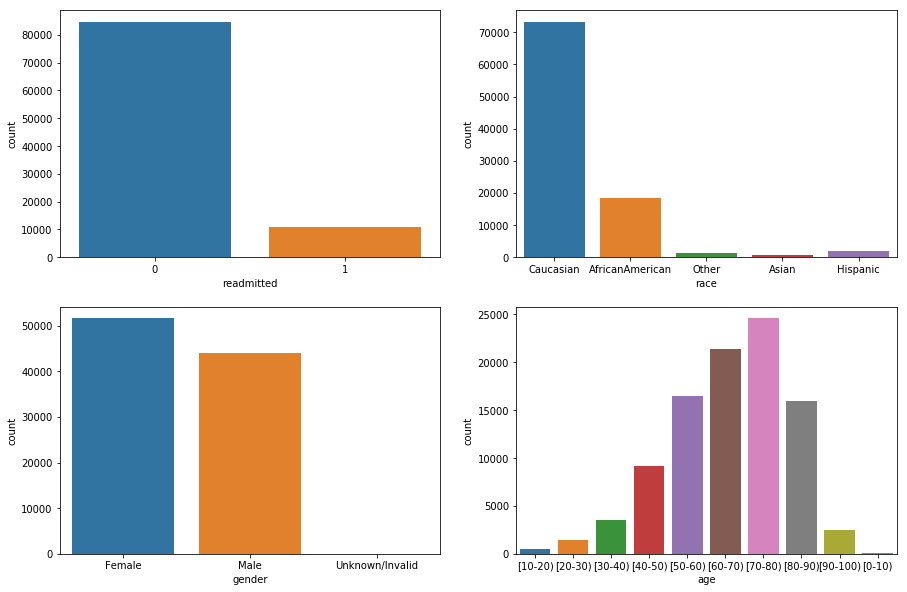

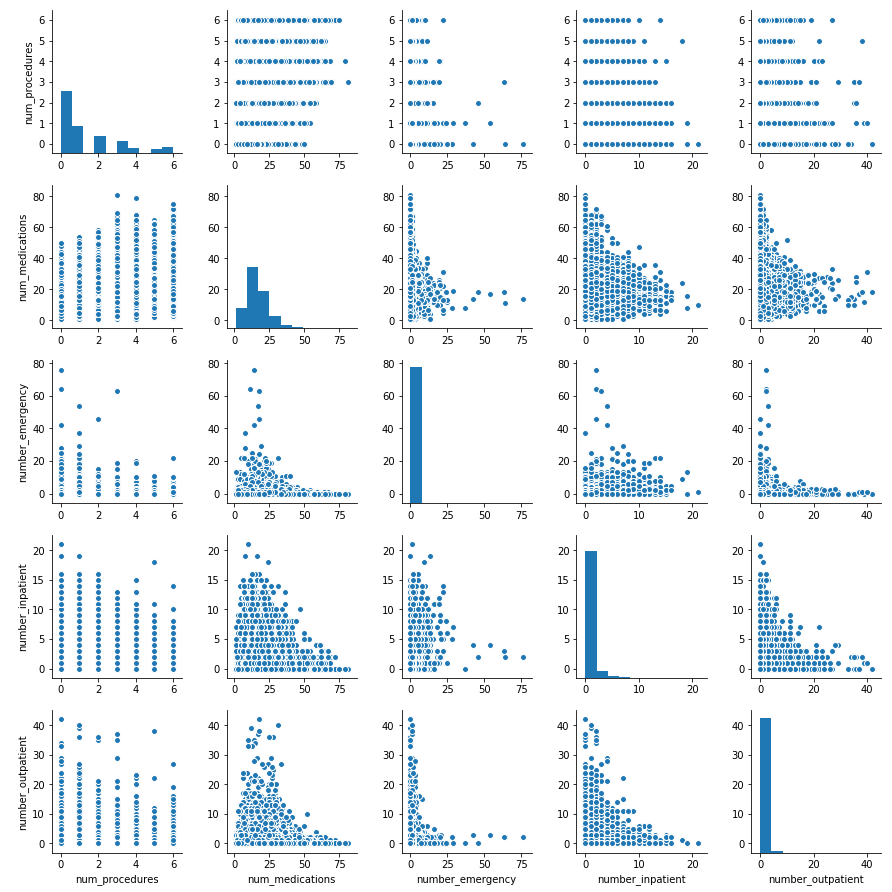

In [71]:
plt.show()

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


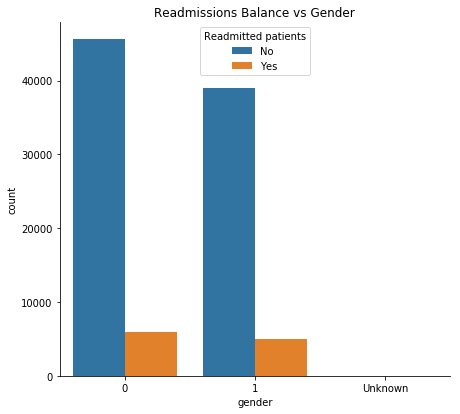

In [75]:
#Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = 'readmitted', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance vs Gender')
plt.show()

# Feature Analysis

**Distribution of Readmission**
Our target variable is imbalance. Number of readmitted patient are quite less as compared to Not readmitted

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Distribution of Readmission')

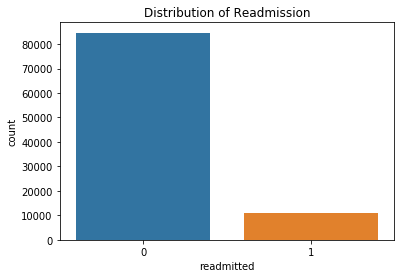

In [78]:
#Distribution of Readmission
sns.countplot(data['readmitted']).set_title('Distribution of Readmission')

In [79]:
plt.show()

As per above graph patients who admitted in less than 30 days are greater than the people who admitted more than 30 days. our target variable is too abnormal

**Time in Hospital and Readmission**

Text(0.5,1,'Time in Hospital VS. Readmission')

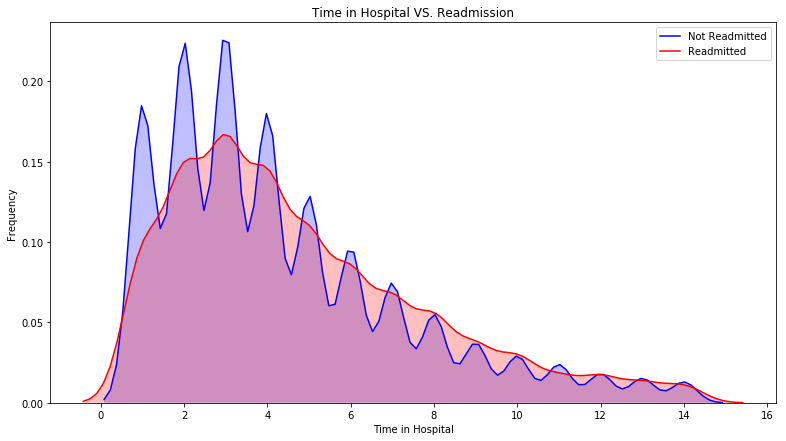

In [80]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(data.loc[(data['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(data.loc[(data['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

In [81]:
plt.show()

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Age of Patient VS. Readmission')

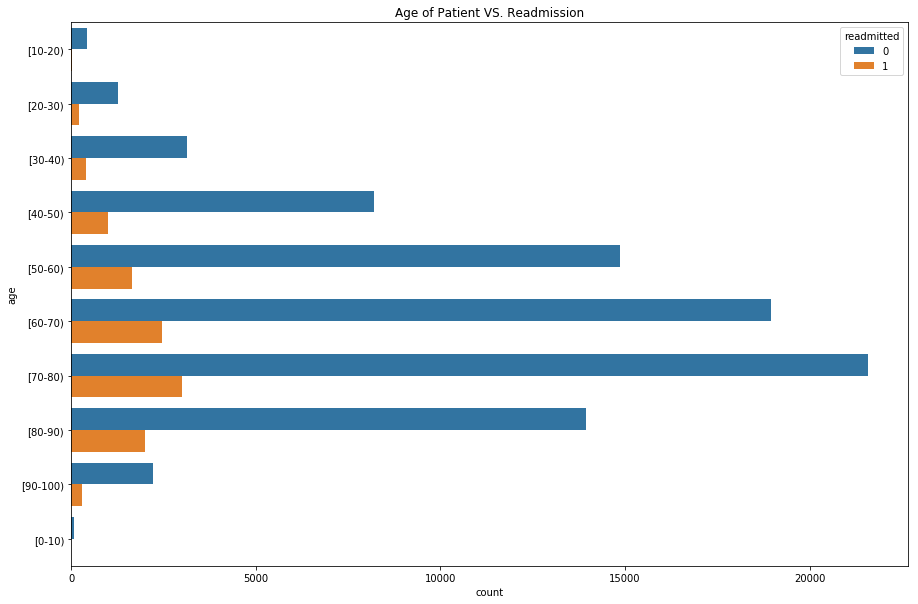

In [82]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= data['age'], hue = data['readmitted']).set_title('Age of Patient VS. Readmission')

In [83]:
plt.show()

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


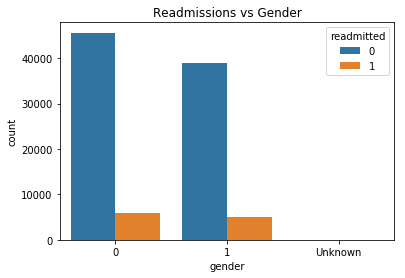

In [84]:
#Gender and Readmissions Male =1, Female = 0

sns.countplot(x = data['gender'], hue = data['readmitted']).set_title("Readmissions vs Gender")
plt.show()

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


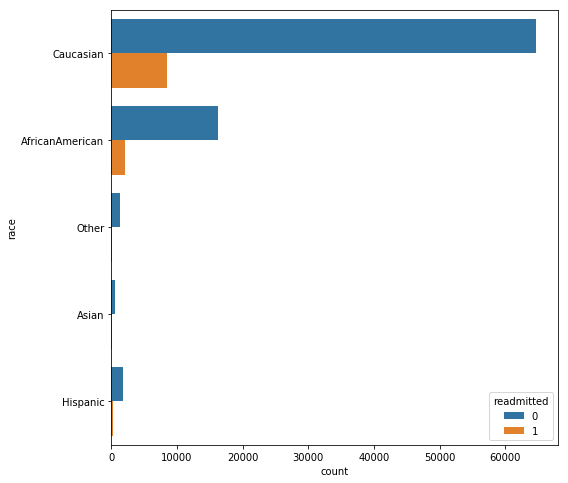

In [85]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = data['race'], hue = data['readmitted'])

In [86]:
plt.show()

**Number of Medication used and readmission**

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Number of medication used VS. Readmission')

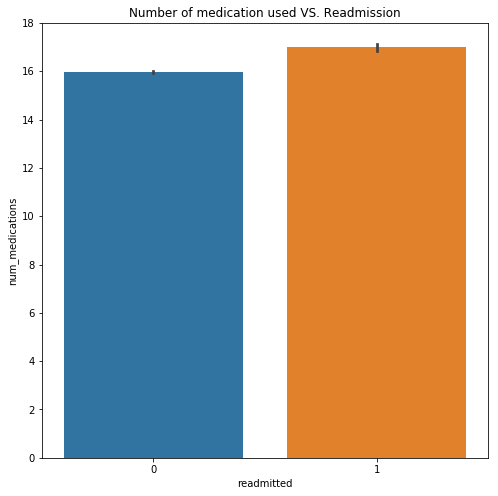

In [87]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = data['readmitted'], y = data['num_medications']).set_title("Number of medication used VS. Readmission")

In [88]:
plt.show()

**Change of Medication and Readmission**
1. Change = 1
2. No Change = 0

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Change of Medication VS. Readmission')

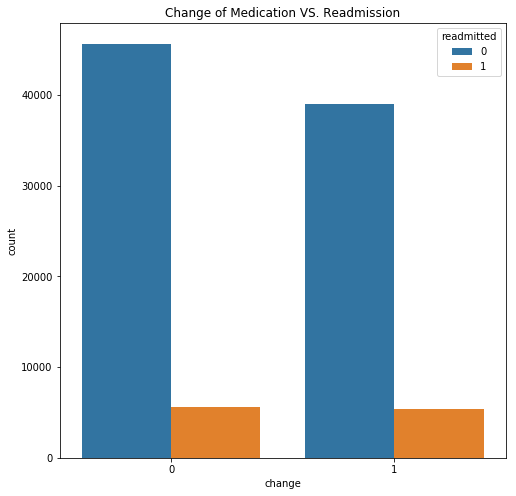

In [89]:
fig = plt.figure(figsize=(8,8))
sns.countplot(data['change'], hue = data['readmitted']).set_title('Change of Medication VS. Readmission')

In [90]:
plt.show()

**Diabetes Medicine vs Readmission**
1. Yes = if the diabetes medicine is prescribed = 1
2. No = if the Medicine is not prescribed = 0

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Diabetes Medication VS Readmission')

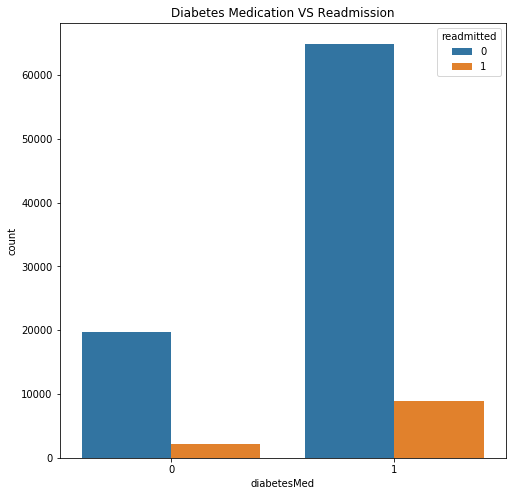

In [91]:
fig = plt.figure(figsize=(8,8))
sns.countplot(data['diabetesMed'], hue = data['readmitted']).set_title('Diabetes Medication VS Readmission')

In [92]:
plt.show()

**Service Utilization and Readmission**

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Service Utilization VS. Readmission')

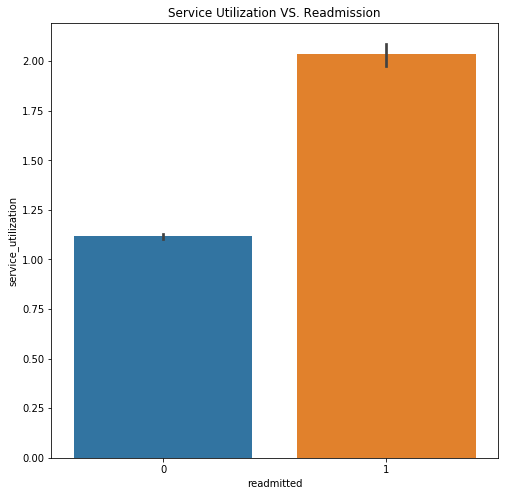

In [93]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = data['service_utilization'], x = data['readmitted']).set_title('Service Utilization VS. Readmission')

In [94]:
plt.show()

** Glucose Serum test result and Readmission**

This test is used for a blood glucose test is used to find out if your blood sugar levels are in healthy range.It is often used to help diagnose and monitor diabetes.

1. '>200' : low = indicates diabetes
2. '>300' : high = Indicates diabetes
3. 'Norm' : Norm = Normal
4. 'None' : None = test was not taken

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Glucose test serum test result VS. Readmission')

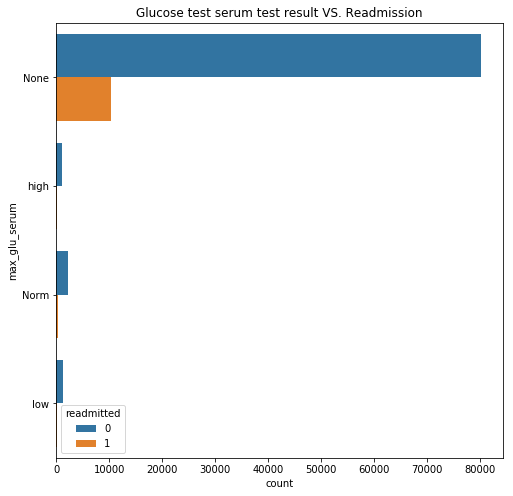

In [95]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = data['max_glu_serum'], hue = data['readmitted']).set_title('Glucose test serum test result VS. Readmission')

In [96]:
plt.show()

Text(0.5,1,'Number of lab procedure VS. Readmission')

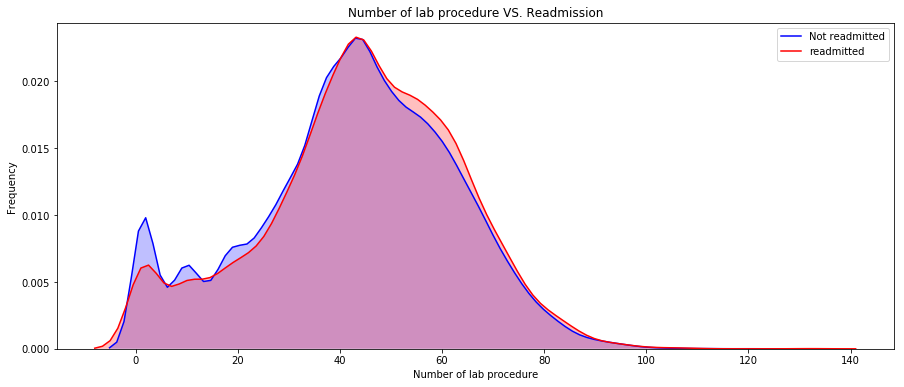

In [97]:
fig = plt.figure(figsize=(15,6))
ax=sns.kdeplot(data.loc[(data['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(data.loc[(data['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

In [98]:
plt.show()

**Pre-Modelling Data Processing**

In [99]:
#The labelEncoder works on only categorical features. We need first to extract the categorial featuers using boolean mask.
# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols = data.columns[categorical_feature_mask].tolist()

In [100]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [101]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,med_spec,rehospitalized_rate,service_utilization,Medication
1,149190,55629189,2,0,1,1,1,7,3,59,...,0,0,0,1,1,0,7,0,0,1
2,64410,86047875,0,0,2,1,1,7,2,11,...,0,0,0,0,1,0,7,0,3,0
3,500364,82442376,2,1,3,1,1,7,2,44,...,0,0,0,1,1,0,7,0,0,1
4,16680,42519267,2,1,4,1,1,7,1,51,...,0,0,0,1,1,0,7,0,0,0
5,35754,82637451,2,1,5,2,1,2,3,31,...,0,0,0,0,1,0,7,0,0,0


In [102]:
data.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,2,0,2,2,2
gender,0,0,1,1,1
age,1,2,3,4,5
admission_type_id,1,1,1,1,2
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,2
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31


# Variance Threshold Factor

In [103]:
X = data.loc[:,data.columns !='readmitted']
Y = data.loc[:,data.columns == 'readmitted']

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif["Features"] = X.columns
vif.sort_values('VIF Factor').reset_index(drop = True)

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1388: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF Factor,Features
0,-0.008763,encounter_id
1,0.062741,patient_nbr
2,1.000216,glimepiride-pioglitazone
3,1.000441,acetohexamide
4,1.000485,metformin-pioglitazone
5,1.000560,troglitazone
6,1.001099,tolbutamide
7,1.001778,tolazamide
8,1.001808,glipizide-metformin
9,1.172587,rehospitalized_rate


**Correlation matrix**

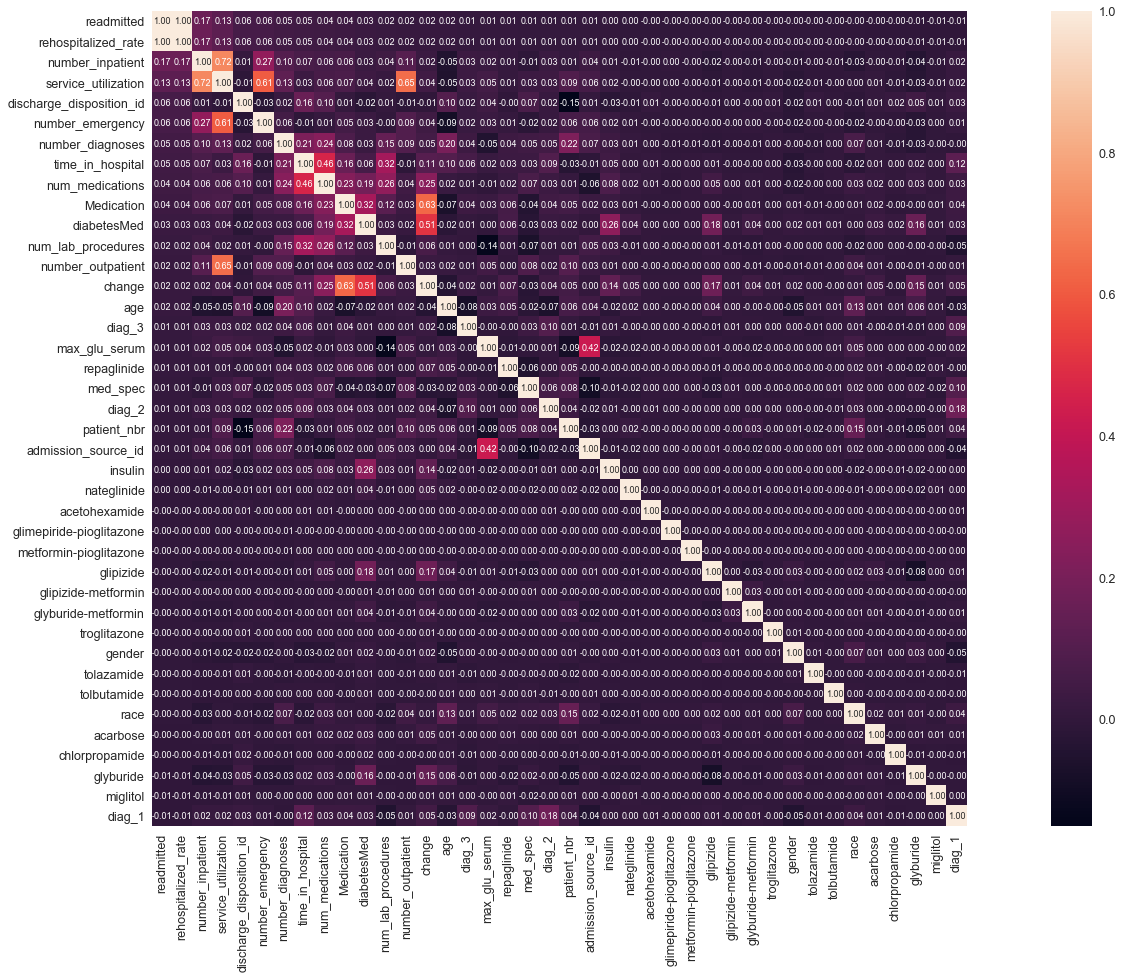

In [105]:
k = 40 #number of variables for heatmap
plt.figure(figsize=(30,15))
corrmat = data.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'readmitted')['readmitted'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [106]:
# get list of only numeric features
num_col = list(set(list(data._get_numeric_data().columns)))
num_col


['num_lab_procedures',
 'metformin',
 'race',
 'number_diagnoses',
 'num_medications',
 'time_in_hospital',
 'age',
 'glimepiride-pioglitazone',
 'tolazamide',
 'chlorpropamide',
 'patient_nbr',
 'rosiglitazone',
 'insulin',
 'diabetesMed',
 'number_emergency',
 'num_procedures',
 'pioglitazone',
 'change',
 'diag_2',
 'repaglinide',
 'Medication',
 'tolbutamide',
 'encounter_id',
 'troglitazone',
 'number_outpatient',
 'diag_1',
 'metformin-pioglitazone',
 'discharge_disposition_id',
 'diag_3',
 'acarbose',
 'metformin-rosiglitazone',
 'admission_source_id',
 'glipizide-metformin',
 'A1Cresult',
 'glipizide',
 'admission_type_id',
 'gender',
 'max_glu_serum',
 'glimepiride',
 'number_inpatient',
 'miglitol',
 'readmitted',
 'service_utilization',
 'nateglinide',
 'med_spec',
 'acetohexamide',
 'rehospitalized_rate',
 'glyburide-metformin',
 'glyburide']

In [107]:
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'age', 'A1Cresult', 'max_glu_serum', 'diag_1', 'diag_2', 'diag_3','med_spec']

In [108]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = data[i].skew()
    skew_before.append(skewval)
    
    kurtval = data[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = data[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(data[data[i] == 0])/len(data) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(data[data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(data[data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(data[data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(data[data[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(data[data[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(data[data[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [109]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,num_lab_procedures,-0.240661,-0.253166,1.964659e+01,No,NA,-0.240661,-0.253166,1.964659e+01
1,metformin,1.664881,2.432896,4.381059e-01,No,NA,1.664881,2.432896,4.381059e-01
2,race,-0.949898,0.617187,8.615816e-01,No,NA,-0.949898,0.617187,8.615816e-01
3,number_diagnoses,-0.801329,-0.385114,1.839222e+00,No,NA,-0.801329,-0.385114,1.839222e+00
4,num_medications,1.341630,3.559365,8.074711e+00,No,NA,1.341630,3.559365,8.074711e+00
5,time_in_hospital,1.131485,0.855660,2.976092e+00,No,NA,1.131485,0.855660,2.976092e+00
6,age,-0.563110,0.102603,1.559124e+00,No,NA,-0.563110,0.102603,1.559124e+00
7,glimepiride-pioglitazone,309.310524,95673.000000,3.232997e-03,Yes,log1p,309.310524,95673.000000,2.240943e-03
8,tolazamide,53.769930,3104.701754,2.044352e-02,Yes,log1p,51.715691,2724.442421,1.390428e-02
9,chlorpropamide,37.696810,1641.009948,3.231764e-02,Yes,log,35.739754,1326.084676,2.125943e-02


In [110]:
#performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            data = data[data[colname] > 0]
            data[colname + "_log"] = np.log(data[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            data = data[data[colname] >= 0]
            data[colname + "_log1p"] = np.log1p(data[colname])

In [111]:
numerics = list(set(list(data._get_numeric_data().columns))- {'readmitted'})
# Feature Scaling
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: data[x].std())
datf['mean'] = datf['features'].apply(lambda x: data[x].mean())

In [112]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

# Modelling

In [113]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'med_spec', 'rehospitalized_rate', 'service_utilization', 'Medication',
       'glimepiride-pioglitazone_log1p', 'tolazamide_log1p',
       'chlorpropamide_log', '

# Logistic Regression

In [114]:
##feature_set = ['gender', 'age', 'discharge_disposition_id', 'admission_source_id',
      'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin','number_inpatient_log1p','number_outpatient_log1p'] 

IndentationError: unexpected indent (<ipython-input-114-a4d351061ae7>, line 2)

In [115]:
feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                 'tolazamide', 'insulin', 'glyburide-metformin', 'gender', 'admission_type_id', 
                 'discharge_disposition_id', 'admission_source_id',  
                 'max_glu_serum', 'A1Cresult',  
                 'diag_1', 'diag_2', 'diag_3','med_spec']

In [116]:
X = data[feature_set]
Y = data['readmitted']

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=None)
LR = LogisticRegression(penalty='l2',fit_intercept=True,intercept_scaling=1,C=2,solver = 'newton-cg' )
LR.fit(X_train, Y_train)
#logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)


LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
LR_predict = LR.predict(X_test)
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(LR_predict, name = 'Predict'), margins = True)

Predict,0,All
Actual,,
0,1738,1738
1,213,213
All,1951,1951


In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, LR_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_test, LR_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_test, LR_predict)))

Accuracy is 0.88
Precision is 0.67
Recall is 0.00


In [120]:
accuracy_LR = accuracy_score(Y_test, LR_predict)
precision_LR = precision_score(Y_test, LR_predict)
recall_LR = recall_score(Y_test, LR_predict)

In [121]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, LR_predict))

[[12449     3]
 [ 1669     6]]


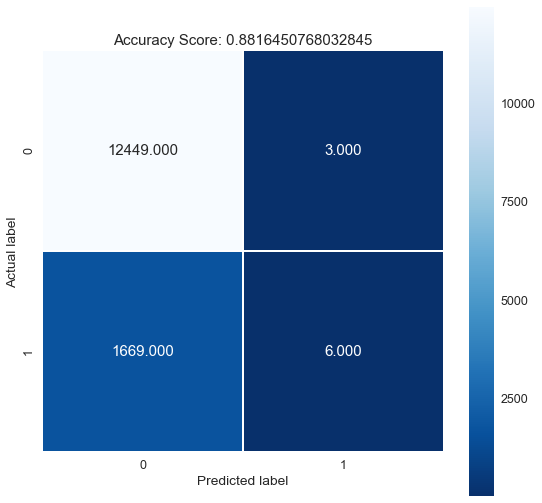

In [122]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Y_test, LR_predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(LR.score(X_test, Y_test))
plt.title(all_sample_title, size = 15);

In [123]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Y_test, LR_predict, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.88      1.00      0.94     12452
         YES       0.67      0.00      0.01      1675

    accuracy                           0.88     14127
   macro avg       0.77      0.50      0.47     14127
weighted avg       0.86      0.88      0.83     14127



In [124]:
# Checking the performance of model using ROC curve plots
YScre = LR.decision_function(X_test)

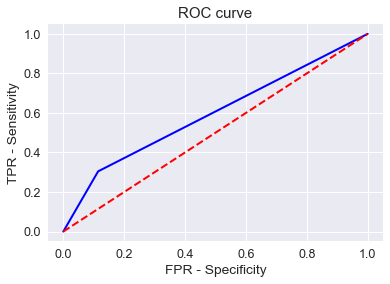

In [125]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve

fpr, tpr,_=roc_curve(LR.predict(X_train),Y_train,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(fpr, tpr, color='blue',
 lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('FPR - Specificity')
plt.ylabel('TPR - Sensitivity')
plt.title('ROC curve')
plt.show()

# Stochastic Gradient Descent

When you have a lot of data logistic regression may take a long time to compute. There is an alternative approach called stochastic gradient descent that works similarly to logistic regression but doesn't use all the data at each iteration.

In [126]:
from sklearn.linear_model import SGDClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=100)
sgdc=SGDClassifier(loss = 'perceptron',alpha = 0.001,random_state = 10)
sgdc.fit(X_train, Y_train)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='perceptron',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=10, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [127]:
SGDC_predict = sgdc.predict(X_test)
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(SGDC_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1711,15,1726
1,212,2,214
All,1923,17,1940


In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, SGDC_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_test, SGDC_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_test, SGDC_predict)))

Accuracy is 0.88
Precision is 0.08
Recall is 0.00


In [129]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, SGDC_predict))

[[12469    73]
 [ 1579     6]]


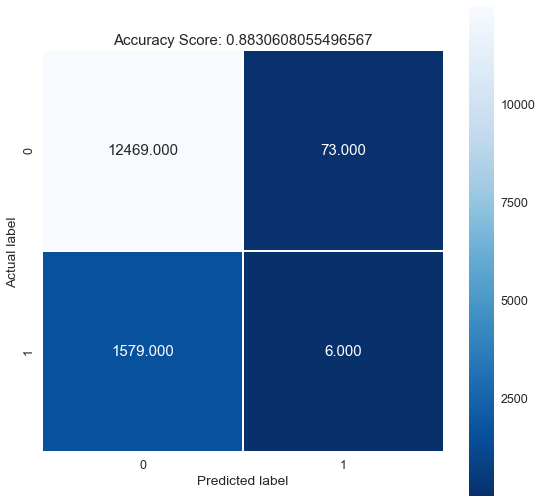

In [130]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Y_test, SGDC_predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(sgdc.score(X_test, Y_test))
plt.title(all_sample_title, size = 15);

# Navie Bayes

In [178]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [179]:
nb_predict = nb.predict(X_test)
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(nb_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1497,229,1726
1,185,29,214
All,1682,258,1940


In [180]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, nb_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_test,nb_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_test, nb_predict)))

Accuracy is 0.81
Precision is 0.20
Recall is 0.25


In [182]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, nb_predict))

[[11004  1538]
 [ 1195   390]]


In [183]:
accuracy_NB = accuracy_score(Y_test, nb_predict)
precision_NB = precision_score(Y_test, nb_predict)
recall_NB = recall_score(Y_test, nb_predict)

AttributeError: 'numpy.ndarray' object has no attribute 'score'

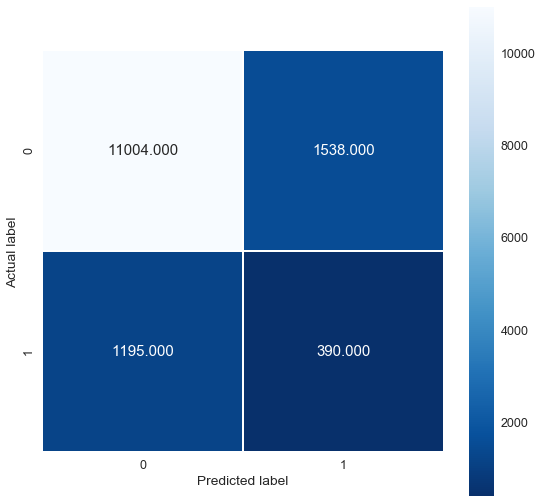

In [136]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Y_test, nb_predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(nb_predict.score(X_test, Y_test))
plt.title(all_sample_title, size = 15);

# Decision Tree

In [139]:
feature_set_no_int = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                 'tolazamide', 'insulin', 'glyburide-metformin', 'gender', 'discharge_disposition_id', 'admission_source_id', 
                 'max_glu_serum', 'A1Cresult', 
                 'diag_1', 'diag_2', 'diag_3','med_spec']

In [140]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=28, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [141]:
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1565,161,1726
1,192,22,214
All,1757,183,1940


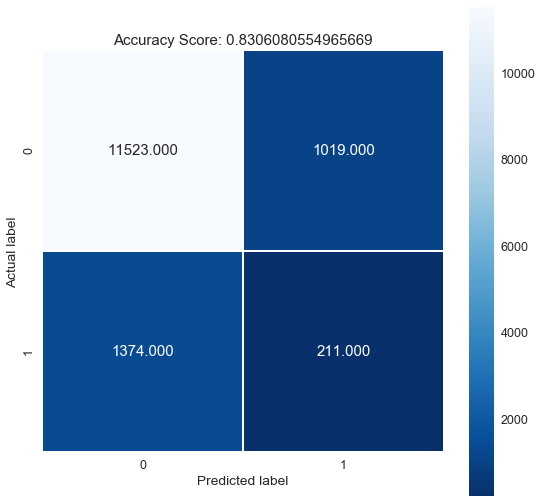

In [142]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Y_test, dtree_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, Y_test))
plt.title(all_sample_title, size = 15);

In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(Y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(Y_test, dtree_pred)))

Accuracy is 0.83
Precision is 0.17
Recall is 0.13


In [144]:
accuracy_DT = accuracy_score(Y_test, dtree_pred)
precision_DT = precision_score(Y_test, dtree_pred)
recall_DT = recall_score(Y_test, dtree_pred)

As we know according to the important variable the decision tree we be built. so now, we are going to take the important variables through the decision tree that has been built.

In [145]:
# listing down the top most important features
features = X_train.columns
import_features = dtree.feature_importances_
top_features = pd.DataFrame([f for f in zip (features, import_features)], columns = ["Feature","Importance"]).nlargest(10,"Importance")
top_features.sort_values(by = "Importance", inplace = True)

In [146]:
print(top_features)

                   Feature  Importance
7         number_diagnoses    0.042855
2           num_procedures    0.044132
30                med_spec    0.052661
6   number_inpatient_log1p    0.053732
0                      age    0.056475
27                  diag_1    0.071027
29                  diag_3    0.073278
1         time_in_hospital    0.073787
28                  diag_2    0.075541
3          num_medications    0.123438


<Container object of 10 artists>

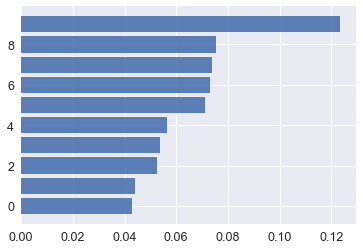

In [147]:
plt.barh(range(len(top_features)), top_features.Importance, align = 'center', alpha = 0.9)

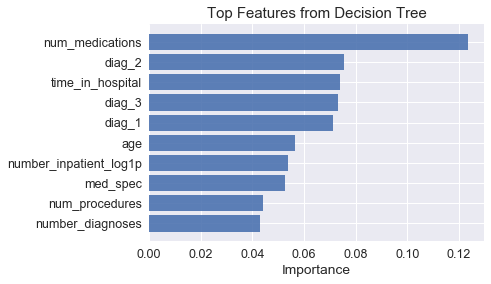

In [148]:
plt.barh(range(len(top_features)), top_features.Importance, align = 'center', alpha = 0.9)
plt.yticks(range(len(top_features)),top_features.Feature)
plt.xlabel('Importance')
plt.title('Top Features from Decision Tree')
plt.show()

# Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 42, n_estimators = 500)
random_forest.fit(X_train,Y_train)
RandomForest = random_forest.predict(X_test)

In [150]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [151]:
rm_prd = rm.predict(X_test)
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1723,3,1726
1,212,2,214
All,1935,5,1940


In [152]:
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(Y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(Y_test, rm_prd)))

Accuracy is 0.89
Precision is 0.46
Recall is 0.02


In [153]:
accuracy_RF = accuracy_score(Y_test, rm_prd)
precision_RF = precision_score(Y_test, rm_prd)
recall_RF = recall_score(Y_test, rm_prd)

In [154]:
#Printing the confusion matrix,
print(confusion_matrix(Y_test, RandomForest))

[[12529    13]
 [ 1574    11]]


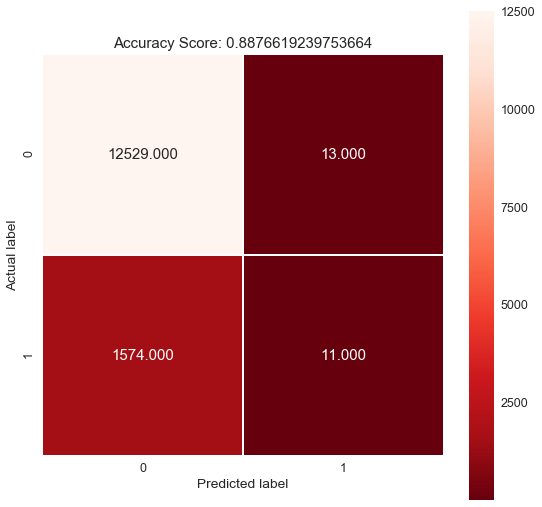

In [155]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Y_test, RandomForest), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(random_forest.score(X_test, Y_test))
plt.title(all_sample_title, size = 15);

In [156]:
print(classification_report(Y_test, RandomForest, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.89      1.00      0.94     12542
         YES       0.46      0.01      0.01      1585

    accuracy                           0.89     14127
   macro avg       0.67      0.50      0.48     14127
weighted avg       0.84      0.89      0.84     14127



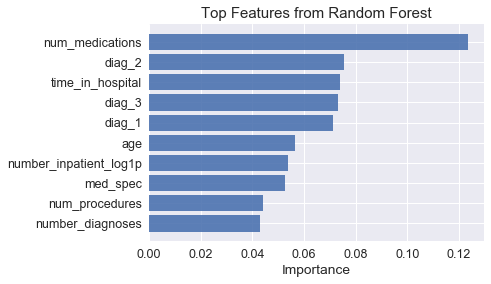

In [157]:
#Determining which features are most important,
# listing down the top most important features
features = X_train.columns
import_features = dtree.feature_importances_
top_features = pd.DataFrame([f for f in zip (features, import_features)], columns = ["Feature","Importance"]).nlargest(10,"Importance")
top_features.sort_values(by = "Importance", inplace = True)
#plt.figure(figsize=(10,6))
plt.barh(range(len(top_features)), top_features.Importance, align = 'center', alpha = 0.9)
plt.yticks(range(len(top_features)),top_features.Feature)
plt.xlabel('Importance')
plt.title('Top Features from Random Forest')
plt.show()

# Gradient Boost Algorithm

In [158]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [159]:
gbc_prd = gbc.predict(X_test)
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(gbc_prd, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1714,12,1726
1,213,1,214
All,1927,13,1940


In [169]:
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, gbc_prd)))
print("Precision is {0:.2f}".format(precision_score(Y_test, gbc_prd)))
print("Recall is {0:.2f}".format(recall_score(Y_test, gbc_prd)))

Accuracy is 0.88
Precision is 0.35
Recall is 0.03


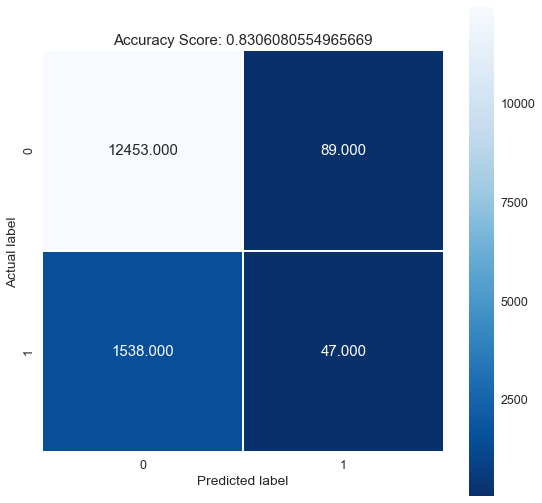

In [170]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Y_test, gbc_prd), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, Y_test))
plt.title(all_sample_title, size = 15);

In [171]:
accuracy_GB = accuracy_score(Y_test, gbc_prd)
precision_GB = precision_score(Y_test, gbc_prd)
recall_GB = recall_score(Y_test, gbc_prd)

# AdaBoosted Classification Model

In [172]:
#Creating a AdaBoosted Classification model,
from sklearn.ensemble import AdaBoostClassifier
adaclass = AdaBoostClassifier(n_estimators = 50, learning_rate = 1, random_state = 200)
adaclass.fit(X_train, Y_train)
yadaclas = adaclass.predict(X_test)

In [173]:
print("The accurary of AdaBoosted Classification model: ", adaclass.score(X_test, Y_test))

The accurary of AdaBoosted Classification model:  0.8875203511007291


In [174]:
#Checking the confusion matrix,
print(confusion_matrix(Y_test, yadaclas))

[[12520    22]
 [ 1567    18]]


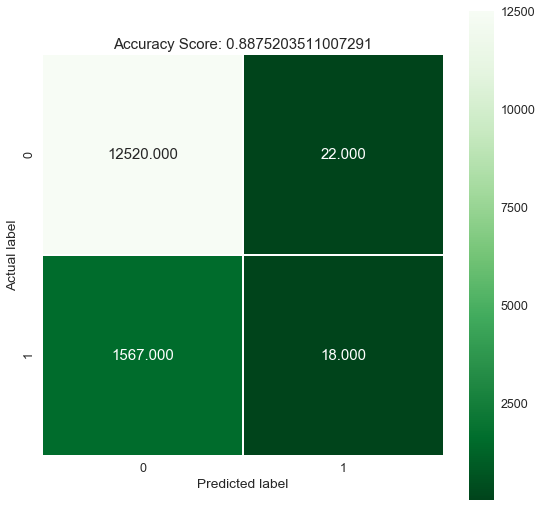

In [165]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Y_test, yadaclas), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(adaclass.score(X_test, Y_test))
plt.title(all_sample_title, size = 15);

In [176]:
accuracy_AB = accuracy_score(Y_test, yadaclas)
precision_AB = precision_score(Y_test, yadaclas)
recall_AB = recall_score(Y_test, yadaclas)

In [166]:
#Checking recall, f1 :-
print(classification_report(Y_test, yadaclas, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.89      1.00      0.94     12542
         YES       0.45      0.01      0.02      1585

    accuracy                           0.89     14127
   macro avg       0.67      0.50      0.48     14127
weighted avg       0.84      0.89      0.84     14127



In [167]:
# calculate the False Positive and True Positive rate to get the ROC curve  
yadaclas = adaclass.decision_function(X_test)
fpr_adaclass, tpr_adaclass, thresholds = roc_curve(Y_test, yadaclas)

# Comparing The Models

C:\Users\DS7_RVepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


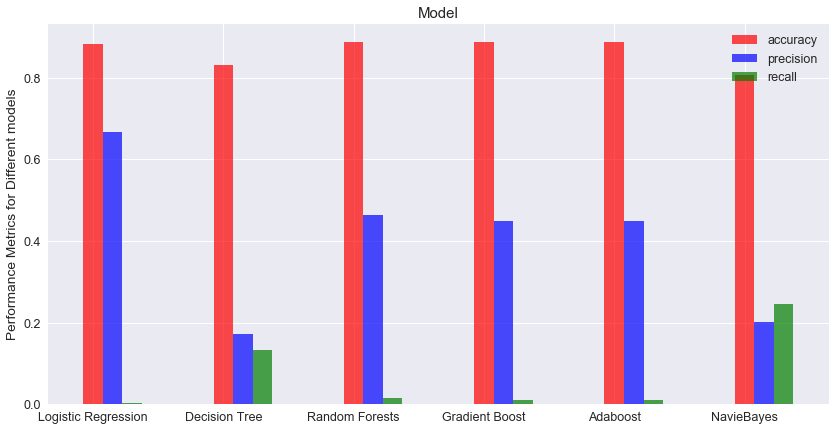

In [184]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests','Gradient Boost','Adaboost','NavieBayes']
values = [accuracy_LR, accuracy_DT, accuracy_RF,accuracy_GB,accuracy_AB,accuracy_NB]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)
           
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Gradient Boost','Adaboost','NavieBayes']
values = [precision_LR, precision_DT, precision_RF, precision_GB,precision_AB,precision_NB]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)

ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests','Gradient Boost', 'Adaboost','NavieBayes' ]
values = [recall_LR, recall_DT, recall_RF,recall_GB, recall_AB, recall_NB]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)

plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()           
